# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

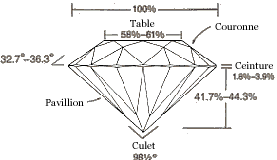

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them next week, but we will be using some of their functionalities.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [2]:
diamonds = pd.read_csv("C:/Users/amandine.gauberville/dataV2-labs/module-2/M2-mini-project1/diamonds.csv")

In [3]:
diamonds_ = diamonds.drop('Unnamed: 0', axis=1, inplace=True)

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [4]:
diamonds.head(10)

carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [6]:
"""Les 3 premiers enregistrements correspondent à des diamants de petite taille, 
relativement de bonne qualité mais de faible poids (carat vers 0,2). Ils correspondent aux prix les moins élevés. 

Il semble que l'ensemble des enregistrements soient classés par ordre croissant en fonction du prix."""

"Les 3 premiers enregistrements correspondent à des diamants de petite taille, \nrelativement de bonne qualité mais de faible poids (carat vers 0,2). Ils correspondent aux prix les moins élevés. \n\nIl semble que l'ensemble des enregistrements soient classés par ordre croissant en fonction du prix."

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [6]:
diamonds.shape

(53940, 10)

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [7]:
# Création d'une échelle de mesures avec 2 dictionnaires :

clarity_dict = {"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4, "VVS2":5, "VVS1":6, "IF":7}

color_dict = {"J":0, "I":1, "H":2, "G":3, "F":4, "E":5, "D":6}

In [8]:
# Création d'une fonction avec pour argument une colonne du DataFrame

def transform_in_measure(col):
    for k,v in clarity_dict.items():
        if col in k:
            return v
            
diamonds['clarity_measure'] = diamonds.clarity.apply(transform_in_measure)

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [9]:
# Création d'une fonction avec pour argument une colonne du DataFrame

def transform_in_measure(col):
    for k,v in color_dict.items():
        if col in k:
            return v
            
diamonds['color_measure'] = diamonds.color.apply(transform_in_measure)

In [10]:
diamonds.head(5)

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   clarity_measure  color_measure  
0                1              5  
1                2              5  
2                4              5  
3                3              1  
4                1              0

With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [11]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            53940 non-null  float64
 1   cut              53940 non-null  object 
 2   color            53940 non-null  object 
 3   clarity          53940 non-null  object 
 4   depth            53940 non-null  float64
 5   table            53940 non-null  float64
 6   price            53940 non-null  int64  
 7   x                53940 non-null  float64
 8   y                53940 non-null  float64
 9   z                53940 non-null  float64
 10  clarity_measure  53940 non-null  int64  
 11  color_measure    53940 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 4.9+ MB


In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [12]:
"""En créant des dictionnaires au lieu d'utiliser la méthode "replace", 
nos 2 colonnes de mesures sont bien de type int64. Il est donc inutile d'appliquer une méthode to_numeric"""

'En créant des dictionnaires au lieu d\'utiliser la méthode "replace", \nnos 2 colonnes de mesures sont bien de type int64. Il est donc inutile d\'appliquer une méthode to_numeric'

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [13]:
diamonds.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  clarity_measure  color_measure  
count  53940.000000  53940.000000     53940.000000   53940.000000  
mean       5.734526      3.538734         3.051020       3.405803  
std        1.142135      0.705699         1.647136       1.701105  
min        0.000000      0.000000         0.000000       0.000000  
25%        4.720000      2.910000         2.000000       2.000000  
50%        5.710000      3.530000         3.000000       3.000000  
75%        6.540000      4.040000         4.000000       5.000000  
max       58.900000     31.800000         7.000000       6.000000

In [14]:
"""La moyenne des prix des diamants est de $3932,79
La médiane étant bien inférieure à la moyenne des prix, nous supposons qu'il y a beaucoup de valeurs aberrantes avec des prix très élevés.
Le poids moyen de l'ensemble des diamants est de 0,79 carat, 
il y a 75% des diamants qui ont un poids inférieur à 1,04 carat alors que le maximum oscille vers 5 carat"""

"La moyenne des prix des diamants est de $3932,79\nLa médiane étant bien inférieure à la moyenne des prix, nous supposons qu'il y a beaucoup de valeurs aberrantes avec des prix très élevés.\nLe poids moyen de l'ensemble des diamants est de 0,79 carat, \nil y a 75% des diamants qui ont un poids inférieur à 1,04 carat alors que le maximum oscille vers 5 carat"

You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [15]:
print("nb diamants avec 0 en longueur:", len(diamonds.query("x == 0")))
print("nb diamants avec 0 en largeur:", len(diamonds.query("y == 0")))
print("nb diamants avec 0 en profondeur:",len(diamonds.query("z == 0")))

nb diamants avec 0 en longueur: 8
nb diamants avec 0 en largeur: 7
nb diamants avec 0 en profondeur: 20


In [16]:
#Les 20 diamants ayant une profondeur égale à 0, sont des enregistrements erronés.

diamonds.query("z == 0")

carat        cut color clarity  depth  table  price     x     y    z  \
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0   
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0   
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0   
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0   
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0   
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0   
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0   
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0   
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0   
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0   
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0   
26123   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0   
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.00  0.00  0.0   
27112   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0   
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.0   
27503   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0   
27739   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0   
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0   
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0   
51506   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0   

       clarity_measure  color_measure  
2207                 1              3  
2314                 0              2  
4791                 1              3  
5471                 1              4  
10167                0              3  
11182                1              4  
11963                3              2  
13601                3              3  
15951                4              3  
24394                1              2  
24520                3              3  
26123                2              1  
26243                6              6  
27112                2              2  
27429                1              2  
27503                3              2  
27739                1              3  
49556                1              4  
49557                1              4  
51506                0              3

In [17]:
#Parmi les 20 enregistrements erronés, 8 diamants ont soit une longueur égale à 0 soit une largeur égale à 0.

list_index = diamonds.query("z == 0").query("x == 0 | y == 0").index
list_index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [18]:
#Suppression des 8 enregistrements avec 2 voire 3 valeurs nulles :

diamonds.drop(list_index, axis=0, inplace=True)

In [19]:
#Vérification de la suppression des 8 enregistrements avec 2 voire 3 valeurs nulles :

diamonds.query("z == 0").query("x == 0 | y == 0")

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z, clarity_measure, color_measure]
Index: []

In [20]:
#Les 12 enregistrements restants
diamonds.query("z == 0")

carat      cut color clarity  depth  table  price     x     y    z  \
2207    1.00  Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0   
2314    1.01  Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0   
4791    1.10  Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0   
5471    1.01  Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0   
10167   1.50     Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0   
13601   1.15    Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0   
24394   2.18  Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0   
26123   2.25  Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0   
27112   2.20  Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0   
27503   2.02  Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0   
27739   2.80     Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0   
51506   1.12  Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0   

       clarity_measure  color_measure  
2207                 1              3  
2314                 0              2  
4791                 1              3  
5471                 1              4  
10167                0              3  
13601                3              3  
24394                1              2  
26123                2              1  
27112                2              2  
27503                3              2  
27739                1              3  
51506                0              3

In [49]:
#Création d'une fonction calculate_z

def calculate_z(row):
    z = diamonds.depth/200 * (diamonds.x + diamonds.y)
    return z

**Apply it just to the rows with incorrect values**

In [51]:
diamonds["z"] = calculate_z(diamonds.query("z == 0"))

In [52]:
diamonds.loc[2207]

carat                    1
cut                Premium
color                    G
clarity                SI2
depth                 59.1
table                   59
price                 3142
x                     6.55
y                     6.48
z                  3.85037
clarity_measure          1
color_measure            3
Name: 2207, dtype: object

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [23]:
#L'ensemble des valeurs 0 ont déjà été supprimées, vérification d'un z avec 0 :

diamonds.query("z == 0")

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z, clarity_measure, color_measure]
Index: []

----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [53]:
##Total depth percentage = z / mean(x, y) 
#Exemple : 2.43 / ((3.95+3.98)/2) * 100 = 61,5
#Ajout de la fonction arrondit à la première décimale afin que le test fonctionne

def validate_z(x,y,z):
    return round(z / ((x + y)/2) * 100, 1)

test = validate_z(diamonds.x, diamonds.y, diamonds.z)
test

0        61.5
1        59.8
2        56.9
3        62.4
4        63.3
         ... 
53935    60.8
53936    63.1
53937    62.8
53938    61.0
53939    62.2
Length: 53932, dtype: float64

In [56]:
diamonds[test != diamonds.depth]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z, clarity_measure, color_measure]
Index: []

In [57]:
#Le test retourne true, les valeurs de z sont donc toutes exactes !

all(test == diamonds.depth)

True

In [28]:
#Les minimums ont bien été modifiés (plus aucun 0)

diamonds.describe()

carat         depth         table         price             x  \
count  53932.000000  53932.000000  53932.000000  53932.000000  53932.000000   
mean       0.797879     61.749336     57.457029   3932.136079      5.732007   
std        0.473986      1.432514      2.234064   3988.734835      1.119670   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.750000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  clarity_measure  color_measure  
count  53932.000000  53932.000000     53932.000000   53932.000000  
mean       5.735254      3.540040         3.051101       3.405789  
std        1.140343      0.695562         1.647109       1.701165  
min        3.680000      2.239050         0.000000       0.000000  
25%        4.720000      2.910060         2.000000       2.000000  
50%        5.710000      3.526310         3.000000       3.000000  
75%        6.540000      4.036780         4.000000       5.000000  
max       58.900000     19.728555         7.000000       6.000000

Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [29]:
diamonds.isna().sum()

carat              0
cut                0
color              0
clarity            0
depth              0
table              0
price              0
x                  0
y                  0
z                  0
clarity_measure    0
color_measure      0
dtype: int64

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [30]:
diamonds.describe()

carat         depth         table         price             x  \
count  53932.000000  53932.000000  53932.000000  53932.000000  53932.000000   
mean       0.797879     61.749336     57.457029   3932.136079      5.732007   
std        0.473986      1.432514      2.234064   3988.734835      1.119670   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.750000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  clarity_measure  color_measure  
count  53932.000000  53932.000000     53932.000000   53932.000000  
mean       5.735254      3.540040         3.051101       3.405789  
std        1.140343      0.695562         1.647109       1.701165  
min        3.680000      2.239050         0.000000       0.000000  
25%        4.720000      2.910060         2.000000       2.000000  
50%        5.710000      3.526310         3.000000       3.000000  
75%        6.540000      4.036780         4.000000       5.000000  
max       58.900000     19.728555         7.000000       6.000000

In [33]:
#Comme nous l'avions vu plus haut, il existe des outliers dans les prix (car la médiane est bien inférieure)

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [31]:
diamonds.price.quantile(0.75)

# 25% des diamants ont un prix supérieur à $5.324.

diamonds.query('price >= 5324')

carat        cut color clarity  depth  table  price     x     y  \
12760   1.21    Premium     H     SI2   62.7   59.0   5324  6.75  6.78   
12761   1.21  Very Good     H     SI2   62.6   61.0   5324  6.70  6.75   
12762   1.21  Very Good     I     SI1   62.1   56.0   5324  6.76  6.92   
12763   1.21      Ideal     J     VS1   62.3   55.0   5324  6.81  6.86   
12764   0.90  Very Good     F     VS1   61.2   56.0   5324  6.18  6.23   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   
27745   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95  8.00   
27746   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20  8.13   
27747   1.51      Ideal     G      IF   61.7   55.0  18806  7.37  7.41   
27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90  7.97   
27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50  8.47   

              z  clarity_measure  color_measure  
12760  4.241655                1              2  
12761  4.209850                1              2  
12762  4.247640                2              1  
12763  4.258205                4              0  
12764  3.797460                4              4  
...         ...              ...            ...  
27745  5.008300                2              2  
27746  5.103125                1              3  
27747  4.559630                7              3  
27748  5.038725                2              3  
27749  5.158880                3              1  

[13486 rows x 12 columns]

In [32]:
diamonds.price.quantile(0.95)

# 2698 diamants ont un prix extrèmement supérieur (supérieur à $13.102). Ce qui représente 5% des diamants.

diamonds.query('price >= 13102')

carat        cut color clarity  depth  table  price     x     y  \
24750   1.73  Very Good     H     VS2   59.2   61.0  13102  7.78  7.82   
24751   1.79    Premium     I     VS1   62.6   59.0  13104  7.72  7.65   
24752   1.50    Premium     H      IF   63.0   59.0  13107  7.30  7.23   
24753   2.03       Good     D     SI2   63.1   59.0  13109  8.12  7.99   
24754   2.02      Ideal     I     SI2   61.7   57.0  13109  8.05  8.12   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   
27745   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95  8.00   
27746   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20  8.13   
27747   1.51      Ideal     G      IF   61.7   55.0  18806  7.37  7.41   
27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90  7.97   
27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50  8.47   

              z  clarity_measure  color_measure  
24750  4.617600                3              2  
24751  4.810810                4              1  
24752  4.576950                7              2  
24753  5.082705                1              6  
24754  4.988445                1              1  
...         ...              ...            ...  
27745  5.008300                2              2  
27746  5.103125                1              3  
27747  4.559630                7              3  
27748  5.038725                2              3  
27749  5.158880                3              1  

[2698 rows x 12 columns]

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

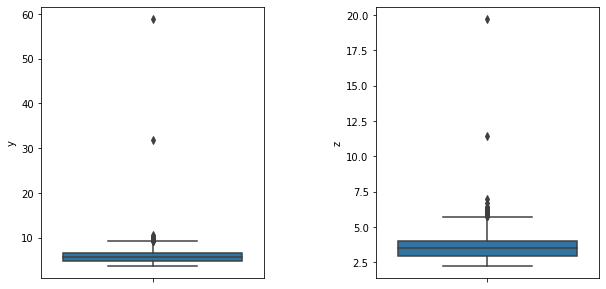

In [33]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [34]:
#Création d'une liste d'index qui identifient les largeurs de diamants supérieur à 10

liste_index_y = diamonds[diamonds.y > 10].index
liste_index_y

Int64Index([24067, 25998, 27415, 27630, 49189], dtype='int64')

In [35]:
#Remplacement des valeurs supérieures à 10, par 0 dans y et z dans le but de supprimer ces outliers

diamonds.loc[liste_index_y,['y','z']] = 0

Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [36]:
#Recalcul de z (avec y = 0)

diamonds["z"] = calculate_z(diamonds.query("z == 0"))

Let's check if we actually corrected the outlier.

In [37]:
diamonds.loc[49189]

carat                 0.51
cut                  Ideal
color                    E
clarity                VS1
depth                 61.8
table                   55
price                 2075
x                     5.15
y                        0
z                  1.59135
clarity_measure          4
color_measure            5
Name: 49189, dtype: object

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [60]:
#Tester la valeur de depth avec la valeur de z

test2 = validate_z(diamonds.x, diamonds.y, diamonds.z)
test2

0        61.5
1        59.8
2        56.9
3        62.4
4        63.3
         ... 
53935    60.8
53936    63.1
53937    62.8
53938    61.0
53939    62.2
Length: 53932, dtype: float64

In [62]:
#La fonction validate_z confirme que toutes les valeurs de z correspondent

diamonds[test2 != diamonds.depth]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z, clarity_measure, color_measure]
Index: []

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [40]:
diamonds[diamonds.y > 10]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z, clarity_measure, color_measure]
Index: []

We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [41]:
def calculate_y(row):
    y = (2 * diamonds.z / (diamonds.depth/100)) - diamonds.x
    return y

In [42]:
diamonds["y"] = calculate_y(diamonds.y)

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

In [64]:
#Tester la valeur de depth avec la valeur de z après calcul de y

test3 = validate_z(diamonds.x, diamonds.y, diamonds.z)
diamonds[test3 != diamonds.depth]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z, clarity_measure, color_measure]
Index: []

In [66]:
#Il n'existe plus d'outliers y au delà de 10.

diamonds[diamonds.y > 10]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z, clarity_measure, color_measure]
Index: []

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

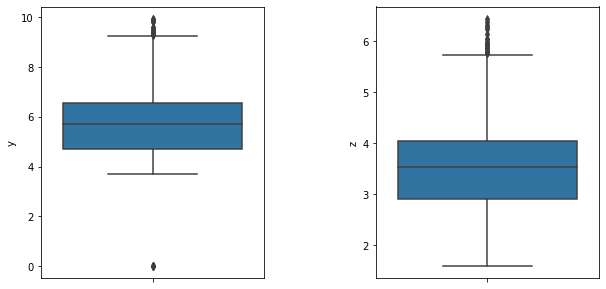

In [44]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [61]:
Oui,50% des valeurs de y (largeur des diamants) sont comprises entre 5 et 7 mm.
50% des valeurs de z (profondeur des diamants) sont comprises entre 3 et 4 mm.

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [77]:
diamonds.to_csv("C:/Users/amandine.gauberville/dataV2-labs/module-2/M2-mini-project1/diamonds_clean.csv", index=False)